# Lab 16 Computer Vision
### Outline
#### Basic Image Processing

#### Harr-Cascades Classifier for Face Detection
#### Make a Project on classifying images as facial emotion recognition with flask web app

## What is Computer Vision?

We are currently living in an age of AI revolution, marked by impressive advancements in the field of deep learning. In just the past few months, we’ve witnessed applications of artificial intelligence that stunned the world by generating realistic pieces of artwork, passing the bar exam, and writing Python code to create websites.

Computer vision is a deep learning application that lies at the heart of this revolution. It allows computers to derive insight from visual input such as images and video files. Examples of computer vision include face detection, facial recognition, human pose estimation, and obstacle detection.In this tutorial, we will explore how to perform face detection with OpenCV, looking at both still and real-time images. 

## Applications of Computer Vision

Why do we need computer vision when human vision is a relatively trivial task for most humans to accomplish?

While it is true that humans can perform visual tasks with ease and require only a few data samples, AI is highly scalable. Computer vision models can process millions of data points when deployed in surveillance and autonomous vehicles. This is a scale that simply cannot be achieved by human vision.

Furthermore, computer vision applications can be integrated into sensors, cameras, and intelligent devices for real-time image processing that involves 24/7 operation. Again, this is an incredibly challenging feat for humans to achieve.

Finally, AI is not susceptible to biases, fatigue, and inattention. While humans may get tired and overlook a security breach, a computer vision application will never falter, thereby reducing the risk of missed incidents.

Let’s look at some real-world applications of computer vision in our daily lives:

### Surveillance

Computer vision applications such as object recognition and pose estimation are often deployed in security devices to automate human surveillance. A pose estimation model, for instance, can track a person’s body language to gauge if they are inciting violence, experiencing a medical emergency, or are about to steal something. These systems can then trigger a notification that alerts the relevant authorities for assistance, decreasing response times and improving public safety.

### Retail

Computer vision models can be deployed in retail outlets to track customers’ eye position, body language, and movement around the store.

These algorithms can provide retailers with the following insight into user behavior:

- Are there any specific promotions or products that capture people’s attention and draw them into the store?
- What path do customers typically take when in the store?
- What type of product placement sparks the most attention?
- How often do customers engage with promotional materials such as banners and signage?


Retailers can then use these insights to improve the store’s marketing strategy and customize product placement to drive sales.

### Autonomous Vehicles

The field of autonomous driving has benefited tremendously from computer vision technologies. 

Object detection models are deployed in vehicles to identify pedestrians, other vehicles, and animals on the road. 

Computer vision applications can interpret stop signs and traffic lights, accurately estimate the distance between the vehicle and other objects, and avoid obstacles like potholes to ensure a safe driving experience.

## Introduction to OpenCV

Now that we understand just how useful computer vision applications are, let’s examine a popular tool used to implement them. [OpenCV](https://opencv.org/) is a computer vision library that supports programming languages like Python, C++, and Java.

The package was initially created by Intel in 1999 and was later made open-source and released to the public.

OpenCV allows developers and non-mathematicians to build computer vision applications easily without having to code them from scratch. The library has over 2,500 algorithms that allow users to perform tasks like face recognition and object detection.

Developers and data practitioners at well-established organizations like Google, Microsoft, IBM, and Intel make extensive use of the OpenCV library, which is currently free for commercial use.

In this article, we will use OpenCV to perform face detection in Python.

By the end of this lab, you will know how to:

- Detect human faces in images with OpenCV in Python
- Perform real-time face detection in a live stream from a webcam



## What is Face Detection?

Face detection involves identifying a person’s face in an image or video. This is done by analyzing the visual input to determine whether a person’s facial features are present.

Since human faces are so diverse, face detection models typically need to be trained on large amounts of input data for them to be accurate. The training dataset must contain a sufficient representation of people who come from different backgrounds, genders, and cultures.

These algorithms also need to be fed many training samples comprising different lighting, angles, and orientations to make correct predictions in real-world scenarios.

These nuances make face detection a non-trivial, time-consuming task that requires hours of model training and millions of data samples.

Thankfully, the OpenCV package comes with pre-trained models for face detection, which means that we don’t have to train an algorithm from scratch. More specifically, the library employs a machine learning approach called Haar cascade to identify objects in visual data. 


### Intro to Haar Cascade Classifiers

This method was first introduced in the paper [Rapid Object Detection Using a Boosted Cascade of Simple Features](https://www.researchgate.net/publication/3940582_Rapid_Object_Detection_using_a_Boosted_Cascade_of_Simple_Features), written by Paul Viola and Michael Jones.

The idea behind this technique involves using a cascade of classifiers to detect different features in an image. These classifiers are then combined into one strong classifier that can accurately distinguish between samples that contain a human face from those that don’t.

The Haar Cascade classifier that is built into OpenCV has already been trained on a large dataset of human faces, so no further training is required. We just need to load the classifier from the library and use it to perform face detection on an input image.

### Installing OpenCV for Python

To install the OpenCV library, simply open your command prompt or terminal window and run the following command:

In [1]:
#!pip install opencv-python

This command will only work if you already have pip installed on your device. If you’d like to learn more about the pip package manager, you can read our [PIP Python Tutorial](https://www.datacamp.com/tutorial/pip-python-package-manager).

### OpenCV for Face Detection in Images

We will build a detector to identify the human face in a [photo](https://unsplash.com/photos/rpF3p_RrE9g) from Unsplash. Make sure to save the picture to your working directory and rename it to `input_image` before coding along.

#### Step 1: Import the OpenCV Package

Now, let’s import OpenCV and enter the input image path with the following lines of code:

In [4]:
import cv2
import matplotlib.pyplot as plt

#### Step 2: Read the Image

Then, we need to read the image with OpenCV’s imread() function:

In [5]:
imagePath = 'input_image.jpg'
img = cv2.imread(imagePath)

This will load the image from the specified file path and return it in the form of a Numpy array. 

Let’s print the dimensions of this array:

In [3]:
img.shape

(4000, 2667, 3)

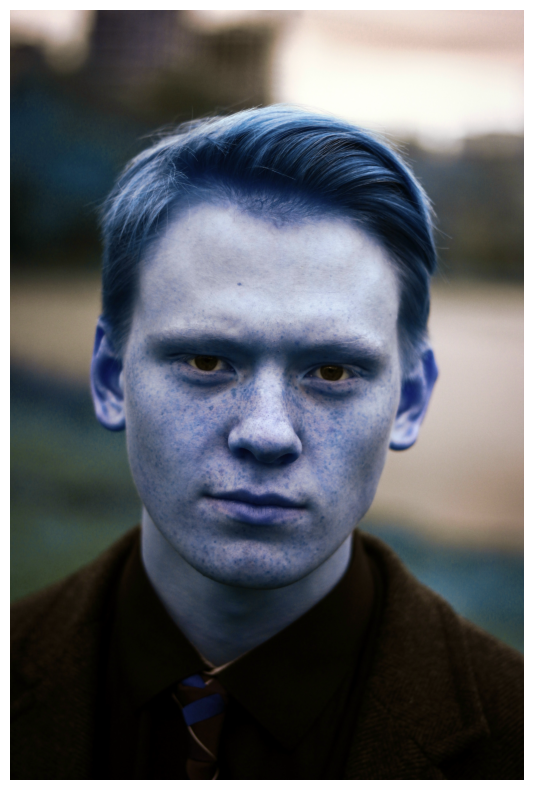

In [4]:
plt.figure(figsize=(20,10))
plt.imshow(img)
plt.axis('off')
plt.show()

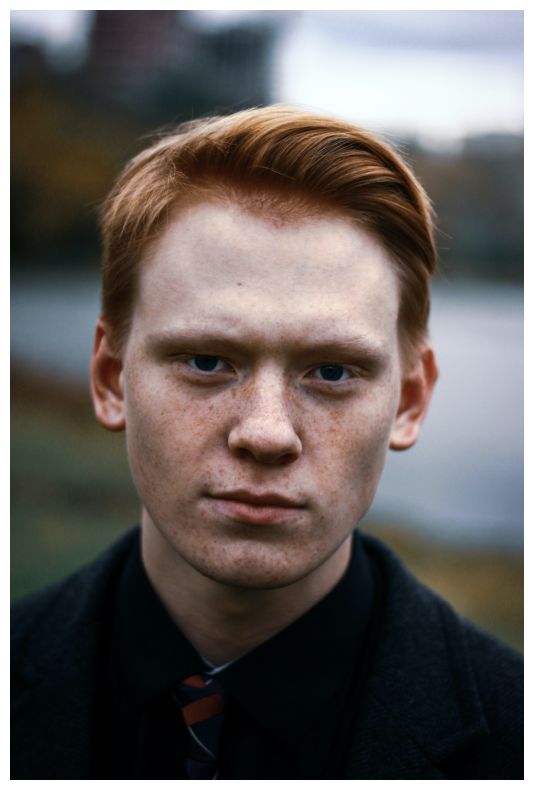

In [5]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,10))
plt.imshow(img)
plt.axis('off')
plt.show()

Notice that this is a 3-dimensional array. The array’s values represent the picture’s height, width, and channels respectively. Since this is a color image, there are three channels used to depict it - blue, green, and red (BGR). 

Note that while the conventional sequence used to represent images is RGB (Red, Blue, Green), the OpenCV library uses the opposite layout (Blue, Green, Red).

#### Step 3: Convert the Image to Grayscale

To improve computational efficiency, we first need to convert this image to grayscale before performing face detection on it:

In [6]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Let’s now examine the dimensions of this grayscale image:

In [7]:
gray_image.shape

(4000, 2667)

In [8]:
img_resize = cv2.resize(gray_image,(800,800))
img_resize.shape

(800, 800)

In [9]:
cv2.imshow('window',img_resize)
cv2.waitKey(0)

-1

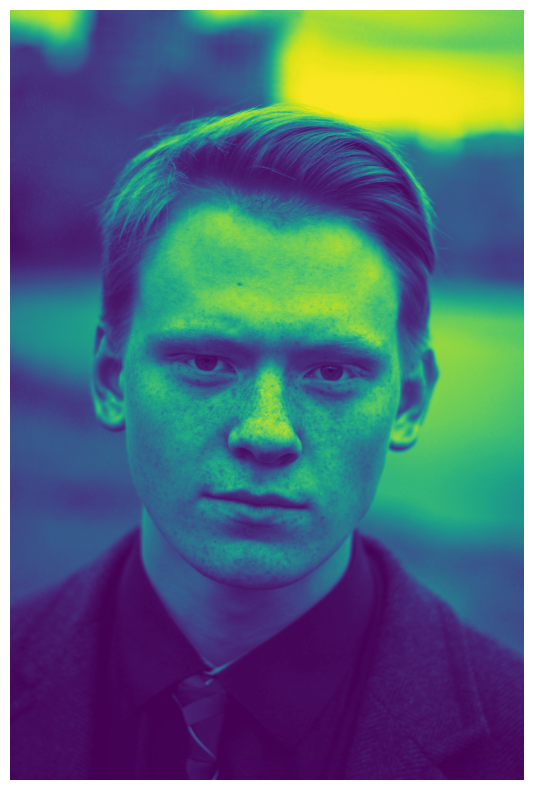

In [10]:
plt.figure(figsize=(20,10))
plt.imshow(gray_image)
plt.axis('off')
plt.show()

Notice that this array only has two values since the image is grayscale and no longer has the third color channel.

#### Step 4: Load the Classifier

Let’s load the pre-trained Haar Cascade classifier that is built into OpenCV:

In [6]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

Notice that we are using a file called `haarcascade_frontalface_default.xml`. This classifier is designed specifically for detecting frontal faces in visual input. 

OpenCV also provides other pre-trained models to detect different objects within an image - such as a person’s eyes, smile, upper body, and even a vehicle’s license plate. You can learn more about the different classifiers built into OpenCV by examining the library’s [GitHub repository](https://github.com/opencv/opencv/tree/master/data/haarcascades).

#### Step 5: Perform the Face Detection

We can now perform face detection on the grayscale image using the classifier we just loaded:

In [7]:
face = face_classifier.detectMultiScale(img)
face

array([[ 400, 1152, 1849, 1849]])

In [10]:
face = face_classifier.detectMultiScale(
    img_resize, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

NameError: name 'img_resize' is not defined

Let’s break down the methods and parameters specified in the above code:

- detectMultiScale():


The detectMultiScale() method is used to identify faces of different sizes in the input image.

- `grey_image`:


The first parameter in this method is called `grey_image`, which is the grayscale image we created previously.

- `scaleFactor`:


This parameter is used to scale down the size of the input image to make it easier for the algorithm to detect larger faces. In this case, we have specified a scale factor of 1.1, indicating that we want to reduce the image size by 10%.

- `minNeighbors`:


The cascade classifier applies a sliding window through the image to detect faces in it. You can think of these windows as rectangles. 

Initially, the classifier will capture a large number of false positives. These are eliminated using the `minNeighbors` parameter, which specifies the number of neighboring rectangles that need to be identified for an object to be considered a valid detection.

To summarize, passing a small value like 0 or 1 to this parameter would result in a high number of false positives, whereas a large number could lead to losing out on many true positives.

The trick here is to find a tradeoff that allows us to eliminate false positives while also accurately identifying true positives.

- `minSize`:


Finally, the `minSize` parameter sets the minimum size of the object to be detected. The model will ignore faces that are smaller than the minimum size specified.

#### Step 6: Drawing a Bounding Box

Now that the model has detected the faces within the image, let’s run the following lines of code to create a bounding box around these faces:

In [14]:
for (x, y, w, h) in face:
    cv2.rectangle(img_resize, (x, y), (x + w, y + h), (0, 255, 0), 4)

The `face` variable is an array with four values: the x and y axis in which the faces were detected, and their width and height. The above code iterates over the identified faces and creates a bounding box that spans across these measurements.

The parameter `0,255,0` represents the color of the bounding box, which is green, and `4` indicates its thickness.

#### Step 7: Displaying the Image

To display the image with the detected faces, we first need to convert the image from the BGR format to RGB:

In [15]:
#img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [16]:
cv2.imshow('window',img_resize)
cv2.waitKey(0)

-1

Now, let’s use the Matplotlib library to display the image:

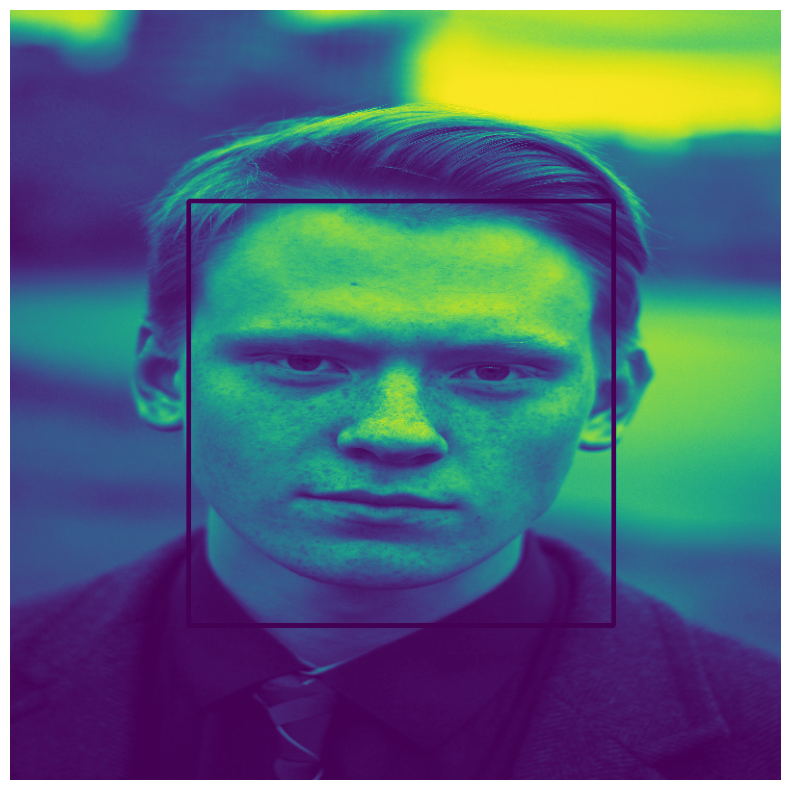

In [17]:
import matplotlib.pyplot as plt
img_rgb = cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(img_resize)
plt.axis('off')
plt.show()

### Task - 1

In [1]:
# load image by the name people1.jpg ,the file is  in same directory you can find it 

In [5]:
# resize image

In [2]:
# show image using cv2 and plt

In [3]:
#convert to greyscale

In [8]:
#load the haarcascade frontal face classier and implement on gray image without optimizing parameters

In [9]:
#find the length and check for number of relevant faces

In [10]:
# draw bounding box on each face 

#### Task if you found any non detected face you can add the parameters(scalefactor,minsize,maxsize) and tune it's values

In [12]:
# visualize the output

In [14]:
# write a function that take an image from user input and further implemeny the all steps mentioned above on that image  

Great!

The model has successfully detected the human face in this image and created a bounding box around it. 

### Real-Time Face Detection with OpenCV

Now that we have successfully performed face detection on a static image with OpenCV, let’s see how to do the same on a live video stream. 

#### Step 1: Pre-Requisites

First, let’s go ahead and import the OpenCV library and load the Haar Cascade model just like we did in the previous section. You can skip this block of code if you already ran it previously:

In [13]:
import cv2

face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

#### Step 2: Access the Webcam

Now, we need to access our device’s camera to read a live stream of video data. This can be done with the following code:

In [14]:
video_capture = cv2.VideoCapture(0)

Notice that we have passed the parameter `0` to the VideoCapture() function. This tells OpenCV to use the default camera on our device. If you have multiple cameras attached to your device, you can change this parameter value accordingly.

#### Step 3: Identifying Faces in the Video Stream

Now, let’s create a function to detect faces in the video stream and draw a bounding box around them:

In [15]:
def detect_bounding_box(vid):
    gray_image = cv2.cvtColor(vid, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray_image, 1.1, 5, minSize=(40, 40))
    for (x, y, w, h) in faces:
        cv2.rectangle(vid, (x, y), (x + w, y + h), (0, 255, 0), 4)
    return faces

The `detect_bounding_box` function takes the video frame as input.

In this function, we are using the same codes as we did earlier to convert the frame into grayscale before performing face detection.

Then, we are also detecting the face in this image using the same parameter values for `scaleFactor`, `minNeighbors`, and `minSize` as we did previously.

Finally, we draw a green bounding box of thickness `4` around the frame.

#### Step 4: Creating a Loop for Real-Time Face Detection

Now, we need to create an indefinite while loop that will capture the video frame from our webcam and apply the face detection function to it:

In [16]:
while True:

    result, video_frame = video_capture.read()  # read frames from the video
    if result is False:
        break  # terminate the loop if the frame is not read successfully

    faces = detect_bounding_box(
        video_frame
    )  # apply the function we created to the video frame

    cv2.imshow(
        "My Face Detection Project", video_frame
    )  # display the processed frame in a window named "My Face Detection Project"

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

video_capture.release()
cv2.destroyAllWindows()

After running the above code, you should see a window called `My Face Detection Project` appear on the screen:



The algorithm should track your face and create a green bounding box around it regardless of where you move within the frame.

In the frame above, the model recognizes my face and my picture on the driving license I’m holding up.

You can also test the efficacy of this model by holding up multiple pictures or by getting different people to stand at various angles behind the camera. The model should be able to identify all human faces in different backgrounds or lighting settings.

If you’d like to exit the program, you can press the “q” key on your keyboard to break out of the loop.

## Face Detection with OpenCV - Next Steps

Now that you have learned to successfully detect human faces in both images and real-time videos using the OpenCV library, here are some steps you can take to bring your knowledge to the next level:

### Create Your Own Project

You can use the code provided in this tutorial as a starting point for your own face detection project.

One way to expand this project is to identify human faces in different types of input data, such as PDF files or surveillance images. You can even set up a security camera of your own and perform face detection on the data it captures in real-time.

Also, you can create a face detection model on large datasets or go a step further and perform tasks like detecting whether a person is wearing masks in image datasets.

The [Face Detection in Images](https://www.kaggle.com/datasets/dataturks/face-detection-in-images/code) and [Face Mask Detection](https://www.kaggle.com/datasets/andrewmvd/face-mask-detection) datasets on Kaggle are good starting points for a portfolio project in this area.

### Build a Facial Recognition Model

While face detection is used to detect a human face in visual input, facial recognition goes a step further. This technology is used to verify a person’s identity by matching their face against an existing database.

You can attempt to build a facial recognition model that identifies a specific face (maybe even yours) amongst a crowd of other people. 

This task will be slightly more challenging than face detection since the model must be trained on many data samples before it can distinguish between people.

Before building a face recognition model, you might also need to perform pre-processing techniques such as noise reduction and image transformation. 

If these concepts sound foreign to you, don’t fret! You can learn all about image processing by taking our [Image Processing in Python](https://www.datacamp.com/courses/image-processing-in-python) course.